In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


N = 100: максимальная ошибка = 75.475707
N = 500: максимальная ошибка = 2.612416
N = 1000: максимальная ошибка = 1.032845
N = 5000: максимальная ошибка = 0.197625


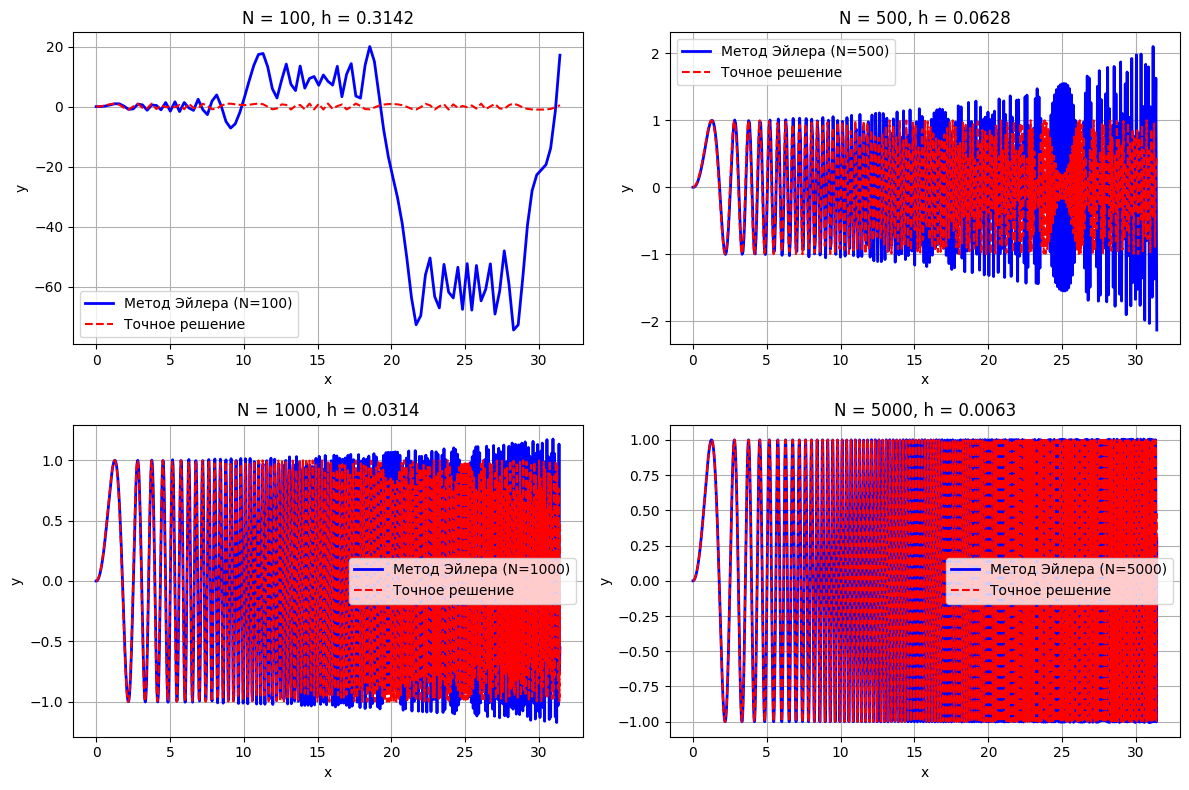

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
x0 = 0.0           # начальная точка
x_end = 10 * np.pi  # конечная точка (≈31.4159)
y0 = 0.0           # начальное условие

# Функция правой части дифференциального уравнения
def f(x, y):
    return 2 * x * np.cos(x**2)

# Явный метод Эйлера
def euler_explicit(f, x0, y0, x_end, N):
    """
    f - функция правой части f(x, y)
    x0, y0 - начальные условия
    x_end - конечная точка
    N - количество шагов
    """
    h = (x_end - x0) / N  # шаг интегрирования
    x = np.linspace(x0, x_end, N+1)  # сетка по x
    y = np.zeros(N+1)  # массив для значений y
    y[0] = y0
    
    # Основной цикл метода Эйлера
    for i in range(N):
        y[i+1] = y[i] + h * f(x[i], y[i])
    
    return x, y

# Вычисление аналитического решения
def exact_solution(x):
    return np.sin(x**2)

# Проверка с разным количеством шагов
N_values = [100, 500, 1000, 5000]  # разные количества шагов

plt.figure(figsize=(12, 8))

for N in N_values:
    x, y_euler = euler_explicit(f, x0, y0, x_end, N)
    y_exact = exact_solution(x)
    
    # Построение графиков
    plt.subplot(2, 2, N_values.index(N) + 1)
    plt.plot(x, y_euler, 'b-', linewidth=2, label=f'Метод Эйлера (N={N})')
    plt.plot(x, y_exact, 'r--', linewidth=1.5, label='Точное решение')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'N = {N}, h = {x_end/N:.4f}')
    plt.legend()
    plt.grid(True)
    
    # Вычисление ошибки
    error = np.abs(y_euler - y_exact).max()
    print(f"N = {N}: максимальная ошибка = {error:.6f}")

plt.tight_layout()
plt.show()

In [20]:

eps = 1e-3

def euler_adaptive_prev(f, x0, y0, x_end, tol=1e-3, safety=0.8, h_min=1e-6, h_max=1.0):

    x_vals = [x0]
    y_vals = [y0]
    h_vals = []

    h = min(h_max, 1/2)

    x_currnet = x0
    y_currnet = y0

    n_steps = 0
    n_rejected = 0

    while x_current < x_end:
        # Корректируем шаг, чтобы не выйти за границу
        if x_current + h > x_end:
            h = x_end - x_current
        
        # Шаг методом Эйлера (h)
        y1 = y_current + h * f(x_current, y_current)
        
        # Два шага по h/2 (для оценки ошибки)
        h_half = h / 2
        y_half1 = y_current + h_half * f(x_current, y_current)
        y_half2 = y_half1 + h_half * f(x_current + h_half, y_half1)
        
        # Оценка ошибки (разность между одним шагом h и двумя шагами h/2)
        error = abs(y1 - y_half2)
        
        # Если ошибка допустима, принимаем шаг
        if error <= tol or h <= h_min:
            # Принимаем более точное значение (два шага по h/2)
            x_current += h
            y_current = y_half2
            
            # Сохраняем результаты
            x_vals.append(x_current)
            y_vals.append(y_current)
            h_vals.append(h)
            
            n_steps += 1
            
            # Предсказываем оптимальный шаг для следующей итерации
            if error > 0:
                # Формула для нового шага на основе текущей ошибки
                h_new = safety * h * (tol / error) ** 0.5
            else:
                # Если ошибка нулевая, можно увеличить шаг
                h_new = h * 2
            
            # Ограничиваем шаг сверху и снизу
            h = min(h_max, max(h_min, h_new))
            
        else:
            # Ошибка слишком велика, уменьшаем шаг
            h_new = safety * h * (tol / error) ** 0.5
            h = max(h_min, h_new)
            n_rejected += 1
    
    print(f"Выполнено шагов: {n_steps}")
    print(f"Отклонено шагов: {n_rejected}")
    print(f"Эффективность: {n_steps/(n_steps + n_rejected)*100:.1f}%")
    print(f"Итоговое количество точек: {len(x_vals)}")
    print(f"Средний шаг: {np.mean(h_vals):.4f}")
    print(f"Минимальный шаг: {np.min(h_vals):.4f}")
    print(f"Максимальный шаг: {np.max(h_vals):.4f}")
    
    return np.array(x_vals), np.array(y_vals), np.array(h_vals)


euler_adaptive_prev(f, x0, y0, x_end)


UnboundLocalError: cannot access local variable 'x_current' where it is not associated with a value